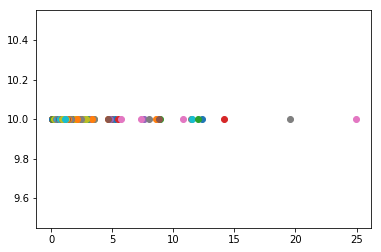

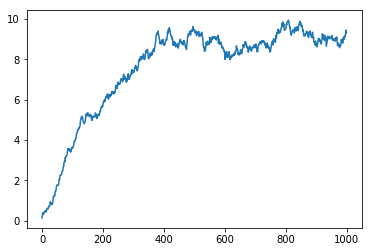

In [9]:
import random # números aleatorios
import math #funciones matematicas estandar.
import matplotlib.pyplot #Para visualizaciones y gráficos.  
import numpy #funciones estadísticas 
import seaborn as sns #para gráficos estadísticos.
from mpl_toolkits.mplot3d import axes3d #permite hacer graficas en 3D 
import pandas as pd
import matplotlib
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

#Datos usados
Dx=[10,11.5, 11,12,14,9.4,6,12,12,12.5] 
Dy=[8,8.8,8.8,10,10,7.5,5.5,12,10,10]

# Modelo , y(x)=mx
def y(x,theta): #theta parametro
    return theta[0]

# Chi Squared chisq=sum_i (m-y_i)^2
def chi2(Dx, Dy, theta):
    s = 0
    for i in xrange(len(Dx)):
        s += (y(Dx[i],theta)-Dy[i])**2 
    return s/len(Dx)

# Funcion likelihood P=exp[chisqu]
def P(Dx,Dy,theta):
    return (-chi2(Dx,Dy,theta))

# Supocision inicial para los parametros
thetavie = [0]
Pvie = P(Dx,Dy,thetavie)
chain = [] # arreglo para guardar la cadena MCMC

# De 100000 generaciones
for i in xrange(1000):
    # Nuevo theta aleatorio
    thetanue = [theta+ 0.1*numpy.random.randn()
                             for theta in thetavie
                     ]
    Pnue = P(Dx,Dy,thetanue)

    # Calculate likelihood ratio
    ratio = math.exp(Pnue-Pvie) #antes era Ln de likelihood, es exp(n/v)

    # Revisar los valores de theta
    r = numpy.random.rand()
    if ratio>r:
        thetavie = thetanue
        Pvie = Pnue
    plt.plot(ratio, len(Dx),'o')    
    # Guardar el valor de thetavie en la cadena
    chain.append(thetavie[0])

# Plot the result
plt.show() 
plt.plot(chain)  

